📊 Entropy Values:
          | 3 | 10 | 20 | 50 | 100
------------------------------------------------------------
Uniform         | 1.5843 | 3.2970 | 4.2885 | 5.5720 | 6.4814
Normal          | 1.2795 | 2.8363 | 3.8129 | 5.0847 | 5.9927
Low Entropy     | 1.2985 | 2.9012 | 3.8578 | 5.1399 | 6.0700
Zero Entropy    | -0.0000 | -0.0000 | -0.0000 | -0.0000 | -0.0000
Max Entropy     | 1.5849 | 3.3099 | 4.3061 | 5.6005 | 6.5473

📊 Mutual Information (проверка с Scikit-Learn):
Uniform: 0.6919
Normal: 0.0000
Low Entropy: 0.0000
Zero Entropy: 0.0000
Max Entropy: 0.0124


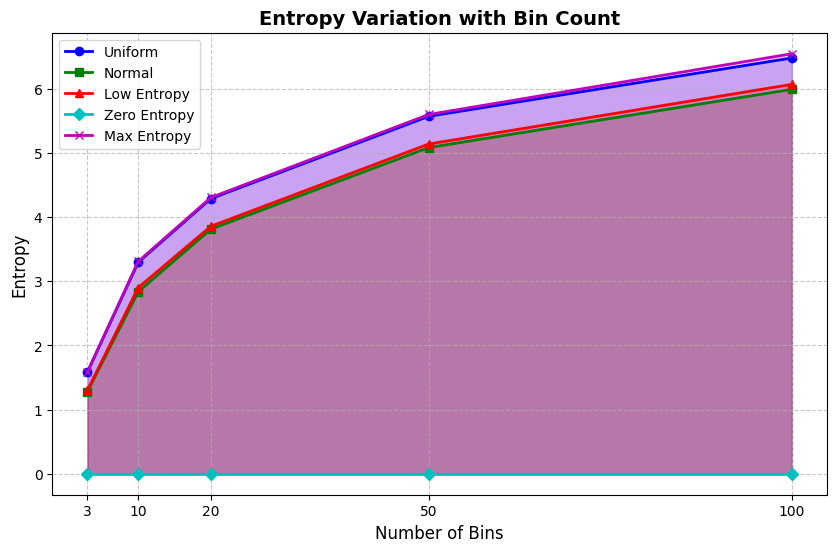


📊 Feature Ranking by Entropy:
Max Entropy: 4.2697
Uniform: 4.2447
Low Entropy: 3.8535
Normal: 3.8012
Zero Entropy: 0.0000


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy

# We capture randomness
np.random.seed(42)
n_samples = 500

# Generate data (5 features with different entropy)
features = {
    "Uniform": np.random.uniform(0, 10, n_samples),  # Высокая энтропия
    "Normal": np.random.normal(5, 1, n_samples),  # Средняя энтропия
    "Low Entropy": np.random.normal(5, 0.001, n_samples),  # Низкая энтропия
    "Zero Entropy": np.full(n_samples, 5),  # Энтропия = 0
    "Max Entropy": np.random.uniform(0, 10, n_samples)  # Почти идеально равномерное распределение
}

X = np.column_stack(list(features.values()))
feature_names = list(features.keys())

# Entropy calculation function
def compute_entropy(data, bins=20):
    hist, _ = np.histogram(data, bins=bins, density=False)
    probabilities = hist / np.sum(hist)  # Превращаем в вероятности
    probabilities = probabilities[probabilities > 0]  # Убираем нули
    return -np.sum(probabilities * np.log2(probabilities))

# Testing the impact of `bins`
bin_counts = [3, 10, 20, 50, 100]
entropy_results = {b: [compute_entropy(X[:, i], bins=b) for i in range(X.shape[1])] for b in bin_counts}

# Output the entropy table
print("📊 Entropy Values:")
print(" " * 10 + "| " + " | ".join(map(str, bin_counts)))
print("-" * 60)
for i, name in enumerate(feature_names):
    values = [entropy_results[b][i] for b in bin_counts]
    print(f"{name:<15} | " + " | ".join(f"{v:.4f}" for v in values))

# Validation with Mutual Information
y = (features["Uniform"] > np.median(features["Uniform"])).astype(int)
mi_scores = mutual_info_classif(X, y, discrete_features=False)

print("\n📊 Mutual Information (проверка с Scikit-Learn):")
for name, mi in zip(feature_names, mi_scores):
    print(f"{name}: {mi:.4f}")

# 📌 Improved graph: entropy change depending on bin_counts
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # Цвета для линий
markers = ['o', 's', '^', 'D', 'x']  # Разные маркеры

for i, (name, color, marker) in enumerate(zip(feature_names, colors, markers)):
    plt.plot(bin_counts, [entropy_results[b][i] for b in bin_counts],
             marker=marker, linestyle='-', linewidth=2, color=color, label=name)
    plt.fill_between(bin_counts, [entropy_results[b][i] for b in bin_counts], alpha=0.2, color=color)

plt.xlabel("Number of Bins", fontsize=12)
plt.ylabel("Entropy", fontsize=12)
plt.title("Entropy Variation with Bin Count", fontsize=14, fontweight='bold')
plt.xticks(bin_counts)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 📌 Ranking features by average entropy
average_entropy = {name: np.mean([entropy_results[b][i] for b in bin_counts]) for i, name in enumerate(feature_names)}
sorted_features = sorted(average_entropy.items(), key=lambda x: x[1], reverse=True)

print("\n📊 Feature Ranking by Entropy:")
for name, ent in sorted_features:
    print(f"{name}: {ent:.4f}")


